# Econ323 Final Project

## The reasons for lower taxation in developing countries

Since taxation is an important aspect of the coercive power of the state, low-income countries collect taxes of 10 to 20% of GDP, while high-income countries are more likely collect taxes of approximately 40% according to Timothy Besley and Torsten Persson's paper titled "Why Do Developing Countries Tax So Little?". So I’m going to investigate the factors that cause the low tax in low and middle-income countries.


In [277]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import sklearn
import sklearn.model_selection
import sklearn.ensemble
from sklearn import (linear_model, metrics, neural_network, pipeline, model_selection)
from sklearn import linear_model
%matplotlib inline
import plotly.express as px
import seaborn as sn

The first dataset was collected from [United Nations University](https://www5.wider.unu.edu/#/?graph=map&indicators=8&activeIndicators=8&activeYear=2010&countries=AFG&activeCountries=AFG). I selected three countries from low-income, middle-income and high-income countries, and collected their total taxes(% of GDP), income taxes(% of GDP), trade taxes(% of GDP) and the total revenue(% of GDP) from this website from 1990 to 2018.
Then I collected GDP per capita from 
[Macrotrends](https://www.macrotrends.net/countries/COD/congo-dem-rep/gdp-per-capita).



In [219]:
df = pd.read_excel('three_taxation.xlsx')
df

,COUNTRY,YEAR,GDP_PER_CAPITA,TOTAL_TAXES,INCOME_TAXES,TRADE_TAXES,TOTAL_REVENUE,TOTAL_TAXES/TOTAL_REVENUE
0,Canada,1990,21449,0.308409,0.170475,0.005781,0.428553,0.719652
1,Canada,1991,21768,0.310221,0.168028,0.005717,0.437697,0.708757
2,Canada,1992,20879,0.303237,0.158157,0.005323,0.440119,0.688988
3,Canada,1993,20121,0.299143,0.154434,0.004905,0.432308,0.691967
4,Canada,1994,19934,0.297932,0.156121,0.004528,0.427245,0.697332
...,...,...,...,...,...,...,...,...
82,Congo,2014,487,0.088990,0.030453,0.017698,0.109502,0.812683
83,Congo,2015,497,0.091712,0.034865,0.016114,0.107249,0.855134
84,Congo,2016,471,0.079898,0.026019,0.011327,0.092897,0.860069
85,Congo,2017,467,0.063759,0.025333,0.007737,0.079182,0.805219


The second dataset was collected from [Transparency International](https://www.transparency.org/en/cpi/2012/index/can). These are the Corruption Perception Index of Canada, China and Congo from 2012 to 2018.

In [220]:
cpi = pd.read_excel('CPI.xlsx')
cpi

,YEAR,CANADA,CHINA,CONGO
0,2012,84,39,21
1,2013,81,40,22
2,2014,81,36,22
3,2015,83,37,22
4,2016,82,40,21
5,2017,82,41,21
6,2018,81,39,20


Text(0.5, 1.0, 'Taxation in Three Countries From 1990 to 2018')

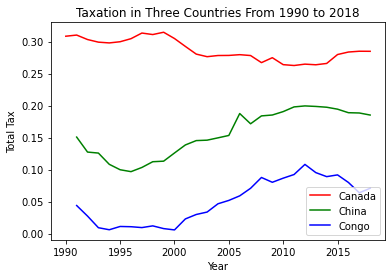

In [120]:
fig, ax = plt.subplots()

ax.plot(df["YEAR"][:29], df["TOTAL_TAXES"][:29], c = 'red', label="Canada")
ax.plot(df["YEAR"][30:58], df["TOTAL_TAXES"][30:58], c = 'green',label="China")
ax.plot(df["YEAR"][59:87], df["TOTAL_TAXES"][59:87], c = 'blue', label="Congo")
ax.set_xlabel("Year")
ax.set_ylabel("Total Tax")
ax.legend()
ax.set_title("Taxation in Three Countries From 1990 to 2018")


This graph provides the total taxes in Canada, China and Congo from 1990 to 2008. We can clearly see that Canada has the most taxation, while Congo has the least total taxes, indicating that high-income countries always have higher taxes than low and middle-income countries.

Text(0.5, 1.0, 'Taxation and GDP per capita of Three Countries From 1990 to 2018')

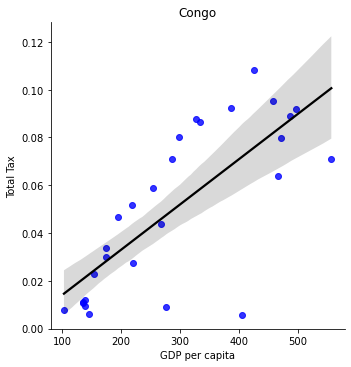

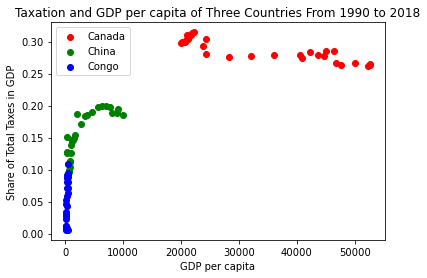

In [317]:
ax=sn.lmplot(x="GDP_PER_CAPITA", y="TOTAL_TAXES", data=df[59:87], scatter_kws={'color': 'blue'} ,line_kws={'color': 'black'},fit_reg=True)
ax.set(xlabel="GDP per capita", ylabel="Total Tax",title="Congo") 

fig, ax = plt.subplots()
ax.scatter(df["GDP_PER_CAPITA"][:29], df["TOTAL_TAXES"][:29], c = 'red', label="Canada")
ax.scatter(df["GDP_PER_CAPITA"][30:58], df["TOTAL_TAXES"][30:58], c = 'green',label="China")
ax.scatter(df["GDP_PER_CAPITA"][59:87], df["TOTAL_TAXES"][59:87], c = 'blue', label="Congo")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Share of Total Taxes in GDP")
ax.legend()
ax.set_title("Taxation and GDP per capita of Three Countries From 1990 to 2018")


The relationship between total tax and GDP per capita from 1990 to 2018 is shown in the two graphs above. 
The first one provides the relationship in Congo, different points indicate how tax shares are correlated with income in different years, which shows a positive linear relationship. 
And the second one is the combination of three countries. Despite the fact that this graph does not display the relevant year, it still shows that Canada, as a high-income country, has the greatest share of total taxes in GDP. On the other hand, Congo has extremely low tax proportion in GDP.

Text(0.5, 1.0, 'Relationship Between Income Tax and Trade Taxes of Three Countries From 1990 to 2018')

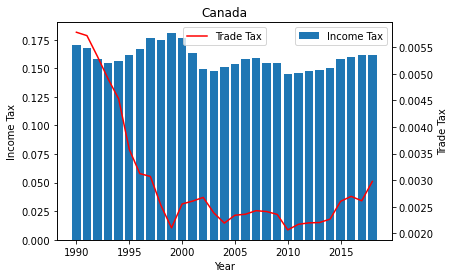

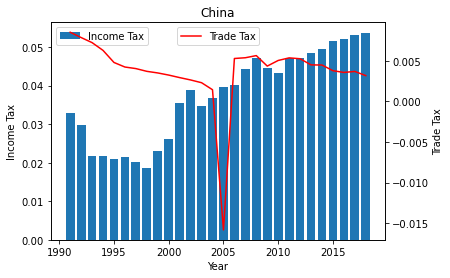

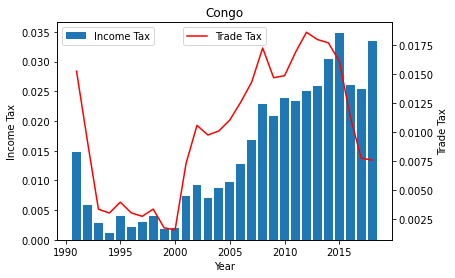

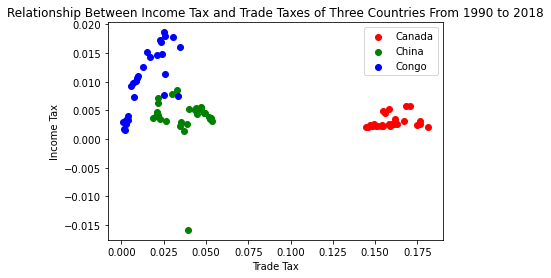

In [319]:
fig, ax = plt.subplots()
ax.bar(df["YEAR"][:29], df["INCOME_TAXES"][:29],label="Income Tax")
ax2 = ax.twinx()
ax2.plot(df["YEAR"][:29], df["TRADE_TAXES"][:29], c = 'red', label="Trade Tax")
ax.set_xlabel("Year")
ax.set_ylabel("Income Tax")
ax2.set_ylabel("Trade Tax")
ax.legend()
ax2.legend(loc=9)
ax.set_title("Canada")


fig, ax = plt.subplots()
ax.bar(df["YEAR"][30:58], df["INCOME_TAXES"][30:58],label="Income Tax")
ax2 = ax.twinx()
ax2.plot(df["YEAR"][30:58], df["TRADE_TAXES"][30:58], c = 'red', label="Trade Tax")
ax.set_xlabel("Year")
ax.set_ylabel("Income Tax")
ax2.set_ylabel("Trade Tax")
ax.legend()
ax2.legend(loc=9)
ax.set_title("China")


fig, ax = plt.subplots()
ax.bar(df["YEAR"][59:87], df["INCOME_TAXES"][59:87],label="Income Tax")
ax2 = ax.twinx()
ax2.plot(df["YEAR"][59:87], df["TRADE_TAXES"][59:87], c = 'red', label="Trade Tax")
ax.set_xlabel("Year")
ax.set_ylabel("Income Tax")
ax2.set_ylabel("Trade Tax")
ax.legend()
ax2.legend(loc=9)
ax.set_title("Congo")


fig, ax = plt.subplots()
ax.scatter(df["INCOME_TAXES"][:29], df["TRADE_TAXES"][:29], c = 'red', label="Canada")
ax.scatter(df["INCOME_TAXES"][30:58], df["TRADE_TAXES"][30:58], c = 'green',label="China")
ax.scatter(df["INCOME_TAXES"][59:87], df["TRADE_TAXES"][59:87], c = 'blue', label="Congo")
ax.set_xlabel("Trade Tax")
ax.set_ylabel("Income Tax")
ax.legend()
ax.set_title("Relationship Between Income Tax and Trade Taxes of Three Countries From 1990 to 2018")



These graphs illustrate how income taxes and trade taxes have changed in Canada, China, and Congo through time.
The first graph provides the information that Canada relied on both trade taxes and income taxes in the past, but that trade taxes have become less important as time goes by. On the other side, China and Congo use much more trade taxes and only a small portion of income taxes, which is clearly to figure out from the last figure. With the development of Free Trade Agreements, for example, more countries will rely less on trade taxes or even not at all, especially high and middle-income countries.

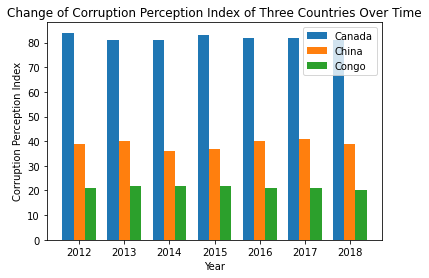

In [141]:
x = np.arange(len(cpi["YEAR"]))
width = 0.25

plt.bar(x-width,cpi["CANADA"],width, label="Canada")
plt.bar(x,cpi["CHINA"],width, label="China",tick_label=cpi["YEAR"])
plt.bar(x+width,cpi["CONGO"],width, label="Congo")
plt.ylabel("Corruption Perception Index")
plt.xlabel("Year")
plt.legend()
plt.title("Change of Corruption Perception Index of Three Countries Over Time")
plt.show()

This figure indicates the Corruption Perception Index(CPI) of Canada, China and Congo, which higher number means lower perceived corruption and lower number means higher perceived corruption. High-income countries such as Canada are receving a higher CPI and vice versa.

Text(0.5, 1.0, 'Total Tax vs CPI From 2012 to 2018')

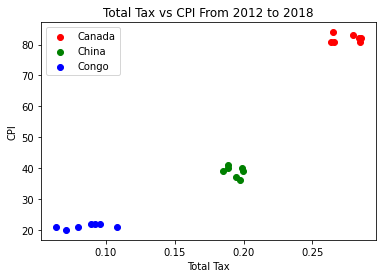

In [256]:
fig, ax = plt.subplots()

ax.scatter(df["TOTAL_TAXES"][22:29], cpi["CANADA"], c = 'red', label="Canada")
ax.scatter(df["TOTAL_TAXES"][51:58], cpi["CHINA"], c = 'green', label="China")
ax.scatter(df["TOTAL_TAXES"][80:87], cpi["CONGO"], c = 'blue', label="Congo")
ax.set_xlabel("Total Tax")
ax.set_ylabel("CPI")
ax.legend()
ax.set_title("Total Tax vs CPI From 2012 to 2018")


This figure shows the relationship between CPI and total taxes. The countries have Higher corruption means that they are less likely to acknowledge or report where these taxation will be used. As we have seen, a country with higher CPI(lower corruption) always receives more total taxes, whereas a country with a greater perception of  corruption receives lower total taxes. This could be explained by the fact that corrupt governments are more likely to face resistance to rising their taxing powers because the citizens are unwilling to support high taxes when their government is corrupt.

## Conclusion

According to the figures above and the research we conducted, high-income countries are always receive higher taxation, particularly in the area of income taxes. 
In addition, some low-income nations, such as Congo, are more likely to experience a war, which causing them to become poorer. 

Taxation is closely related to the development of the country. As a result, the most essential strategy of increasing taxation is to encourage country growth, and the taxation will be improved as the country develops. 
Moreover, details and particular methods such as insisution, are important against corruption, as they can minimize the corruption and boost their ability to tax of the country.